# **Import Libraries & Set Initial Condition**

In [39]:
import matplotlib.pyplot as plt
import numpy as np

In [40]:
tao=float(input('Enter decay constant = '))
N0_A=float(input('Enter N0_A = '))
N0_B=float(input('Enter N0_B = '))

T=10
h=0.1
t = np.arange(0,T,h)

N_A = np.zeros(len(t))
N_A[0] = N0_A
N_B = np.zeros(len(t))
N_B[0] = N0_B

Enter decay constant =  1
Enter N0_A =  100
Enter N0_B =  0


# **Difine Functions & Methods**

In [41]:
n_a = lambda t, N_A , N_B: N_B/tao - N_A/tao
n_b = lambda t, N_A , N_B: N_A/tao - N_B/tao

In [42]:
s_a_exact =lambda t :50 + 50*np.exp(-2*t)
s_b_exact =lambda t :50 - 50*np.exp(-2*t)

In [43]:
def euler(t):
    for i in range(len(t) - 1):
        N_A[i + 1] = N_A[i] + h * n_a(t[i], N_A[i] ,N_B[i])
        N_B[i + 1] = N_B[i] + h * n_b(t[i], N_A[i] ,N_B[i])
    return N_A , N_B

In [44]:
def RK2(t):
    for i in range(len(t) - 1):
        p1 = n_a(t[i] , N_A[i] ,N_B[i])
        p2 = n_a(t[i+1] , N_A[i]+p1*h , N_B[i]+p1*h)
        g1 = n_b(t[i] , N_A[i] ,N_B[i])
        g2 = n_b(t[i+1] , N_A[i]+p1*h , N_B[i]+p1*h)
        N_A[i + 1] = N_A[i] + h /2* (p1+p2)
        N_B[i + 1] = N_B[i] + h /2* (g1+g2)
    return N_A , N_B

In [45]:
def RK4(t):
    for i in range(len(t) - 1):
        p1 = n_a(t[i] , N_A[i] ,N_B[i])
        p2 = n_a(t[i+1] , N_A[i]+p1*h/2 , N_B[i]+p1*h/2)
        p3 = n_a(t[i] , N_A[i]+p2*h/2 , N_B[i]+p2*h/2)
        p4 = n_a(t[i+1] , N_A[i]+p3*h , N_B[i]+p3*h)
        g1 = n_b(t[i] , N_A[i] ,N_B[i])
        g2 = n_b(t[i+1] , N_A[i]+g1*h/2 , N_B[i]+g1*h/2)
        g3 = n_b(t[i] , N_A[i]+g2*h/2 , N_B[i]+g2*h/2)
        g4 = n_b(t[i+1] , N_A[i]+g3*h , N_B[i]+g3*h)
        N_A[i + 1] = N_A[i] + h /6* (p1+p2+p3+p4)
        N_B[i + 1] = N_B[i] + h /6* (g1+g2+g3+g4)
    return N_A , N_B

# **Plotting Results**

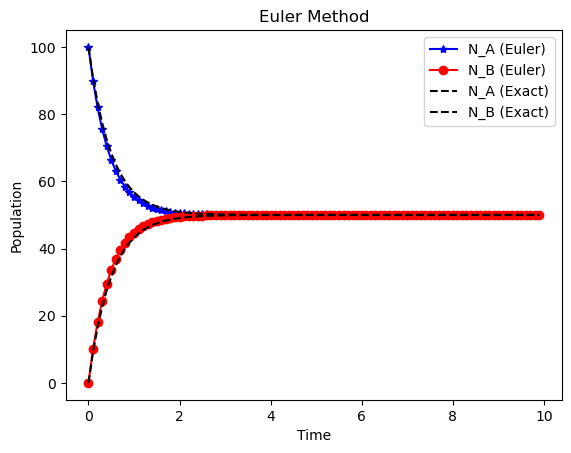

In [61]:
N_A, N_B = euler(t)

exact_A = s_a_exact(t) 
exact_B = s_b_exact(t)

plt.plot(t, N_A, marker='*', linestyle='-', color='b', label='N_A (Euler)')
plt.plot(t, N_B, marker='o', linestyle='-', color='r', label='N_B (Euler)')
plt.plot(t, exact_A, linestyle='--', color='black', label='N_A (Exact)')
plt.plot(t, exact_B,  linestyle='--', color='black', label='N_B (Exact)')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.title('Euler Method')
plt.savefig('Euler',dpi=700)
plt.show()


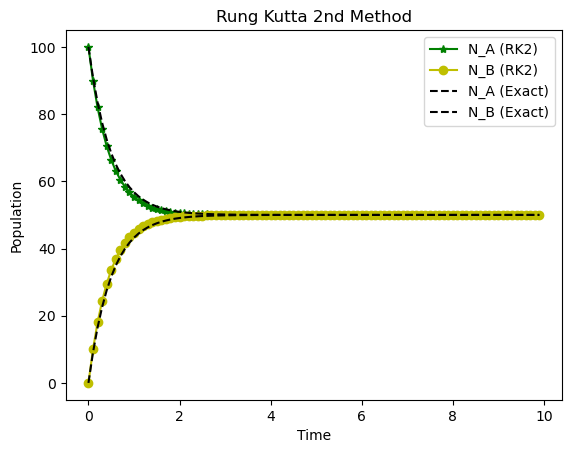

In [59]:
N_A, N_B = RK2(t)

exact_A = s_a_exact(t) 
exact_B = s_b_exact(t)

plt.plot(t, N_A, marker='*', linestyle='-', color='g', label='N_A (RK2)')
plt.plot(t, N_B, marker='o', linestyle='-', color='y', label='N_B (RK2)')
plt.plot(t, exact_A, linestyle='--', color='black', label='N_A (Exact)')
plt.plot(t, exact_B,  linestyle='--', color='black', label='N_B (Exact)')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.title('Rung Kutta 2nd Method')
plt.savefig('RK2',dpi=700)
plt.show()


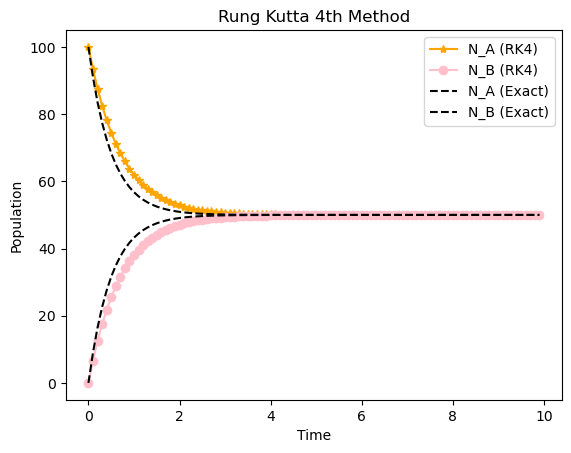

In [67]:
N_A, N_B = RK4(t)

exact_A = s_a_exact(t) 
exact_B = s_b_exact(t)

plt.plot(t, N_A, marker='*', linestyle='-', color='orange', label='N_A (RK4)')
plt.plot(t, N_B, marker='o', linestyle='-', color='pink', label='N_B (RK4)')
plt.plot(t, exact_A, linestyle='--', color='black', label='N_A (Exact)')
plt.plot(t, exact_B,  linestyle='--', color='black', label='N_B (Exact)')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.title('Rung Kutta 4th Method')
plt.savefig('RK4',dpi=700)
plt.show()